## Importing and understanding general overview of data

In [35]:
# Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
app_data = pd.read_csv("../data/KaggleV2-May-2016.csv")

In [37]:
app_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [38]:
app_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  str    
 3   ScheduledDay    110527 non-null  str    
 4   AppointmentDay  110527 non-null  str    
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  str    
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  str    
dtypes: float64(1), int64(8), str(5)
memory usage: 11.8 MB


In [39]:
app_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning

In [40]:
# Checking for missing values
app_data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [41]:
# Checking for Duplicate values
app_data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: bool

In [42]:
print(app_data.shape)
app_data.drop_duplicates()
print(app_data.shape)

(110527, 14)
(110527, 14)


In [43]:
# Checking for misspelt values
print(app_data["Gender"].value_counts())
print(app_data["Neighbourhood"].value_counts())
print(app_data["No-show"].value_counts())

Gender
F    71840
M    38687
Name: count, dtype: int64
Neighbourhood
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: count, Length: 81, dtype: int64
No-show
No     88208
Yes    22319
Name: count, dtype: int64


In [44]:
# Converting Date columns to Datetime
app_data["ScheduledDay"] = pd.to_datetime(app_data["ScheduledDay"]).dt.tz_localize(None)
app_data["AppointmentDay"] = pd.to_datetime(app_data["AppointmentDay"]).dt.tz_localize(None)
app_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [45]:
# Semantic Validation

# Checking for ages less than zero.
invalid_age_count = 0
for age in app_data["Age"]:
    if age < 0:
        invalid_age_count += 1

# Checking for Appointment dates that come before the schedule date        
diff = app_data["AppointmentDay"] - app_data["ScheduledDay"]
invalid_date_count = (diff < pd.Timedelta(0)).sum()

# Printing out the results
print(f"{invalid_age_count} ages are less than or equal to zero making them invalid")
print(f"{invalid_date_count} appoinment dates come before the schedule days making them invalid")

1 ages are less than or equal to zero making them invalid
38568 appoinment dates come before the schedule days making them invalid


In [46]:
# 1. Keeping only ages 0 and above (removes the -1 age)
app_data = app_data[app_data["Age"] >= 0]

# 2. Keeping only rows where Appointment Day is on or after Scheduled Day
# I used .dt.date to ensure I am comparing the days, not the hours
app_data = app_data[app_data["AppointmentDay"].dt.date >= app_data["ScheduledDay"].dt.date]

# Final Check
print(f"Remaining rows: {app_data.shape[0]}")
app_data.isnull().sum()

Remaining rows: 110521


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

The dataset required minimal structural cleaning, allowing me to focus on analytical validation, leakage prevention, and feature relevance rather than missing-data remediation

Questions: 

1. Whats the overall ratio of shows to no-shows?
2. People of what age range and gender are most likely to miss an appointment?
3. How effecive were the SMS message received in ensuring making appointment?
4. Does location (Neighbourhood) have a strong correlation with no-shows?

Question 1:

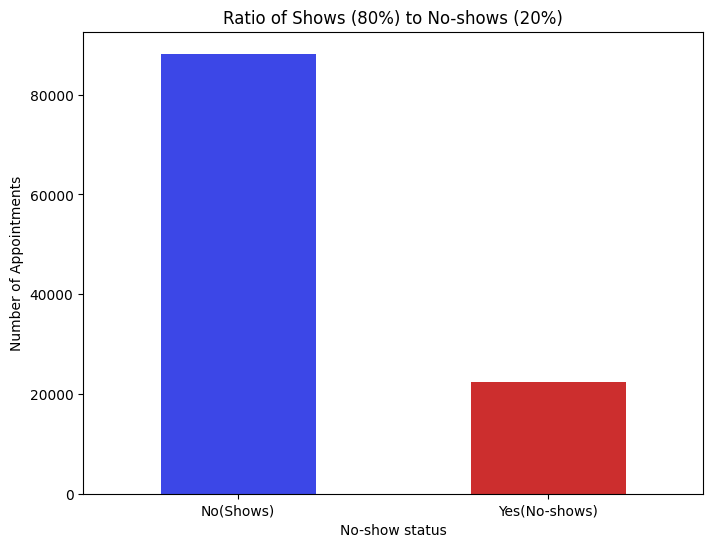

In [47]:
no_show_data = app_data["No-show"].value_counts()

# Calculate percentages for the answer
total = no_show_data.sum()
show_perc = (no_show_data['No'] / total) * 100
noshow_perc = (no_show_data['Yes'] / total) * 100

# Plotting the graph
plt.figure(figsize=(8, 6))
no_show_data.plot(kind="bar", color=["#3c47e7", "#cc2e2e"])

plt.title(f"Ratio of Shows ({round(show_perc)}%) to No-shows ({round(noshow_perc)}%)")
plt.ylabel("Number of Appointments")
plt.xlabel("No-show status")
plt.xticks(ticks=[0, 1], labels=["No(Shows)", "Yes(No-shows)"], rotation=0)

# Saving image 
plt.savefig("../images/ratio_of_shows_to_no-shows.png", bbox_inches="tight")
plt.show()

Question 2:

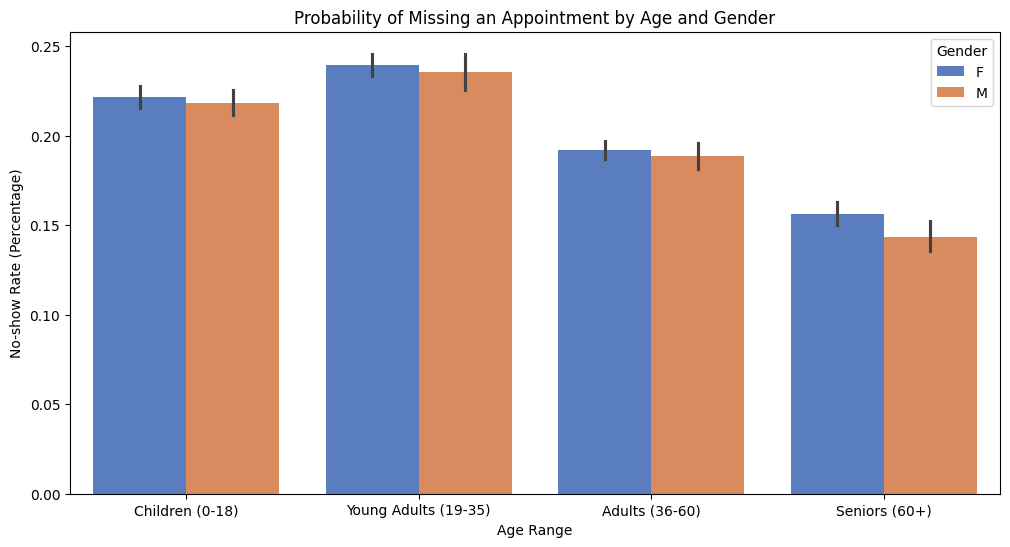

In [48]:
# Create a dummy column: 1 if they didn't show up, 0 if they did
app_data['No_show_numeric'] = app_data['No-show'].apply(lambda x: 1 if x == 'Yes' else 0)

# Create age bins
bins = [0, 18, 35, 60, 115]
labels = ['Children (0-18)', 'Young Adults (19-35)', 'Adults (36-60)', 'Seniors (60+)']
app_data['Age_Range'] = pd.cut(app_data['Age'], bins=bins, labels=labels, include_lowest=True)

# Calculate no-show rate by Age Range
age_ratio = app_data.groupby('Age_Range')['No_show_numeric'].mean()

# Plotting the graph
plt.figure(figsize=(12, 6))
sns.barplot(data=app_data, x='Age_Range', y='No_show_numeric', hue='Gender', palette='muted')

plt.title("Probability of Missing an Appointment by Age and Gender")
plt.ylabel("No-show Rate (Percentage)")
plt.xlabel("Age Range")

# Saving image 
plt.savefig("../images/Probability_of_Missing_an_Appointment_by_Age_and_Gender.png", bbox_inches="tight")
plt.show()